In [7]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf

# Set Up

In [ ]:
data_dir = './AID'
classes = os.listdir(data_dir)

In [3]:
len(classes)

30

In [4]:
# Function to show random image from the dataset 

def random_sample(img_class='all'):
    """
    Returns random images from the dataset
    
    Parameters: 
        img_class: (str) can be 'all', or one of the image classes
        
        
    Returns:
        A random image sample from the data as a NumPy array
    """
    if img_class == 'all':
        class_name = random.choice(classes)
        class_dir = os.path.join(data_dir, class_name)
        imgs = os.listdir(class_dir)
        rndm_img_name = random.choice(imgs)
        img_path = os.path.join(class_dir, rndm_img_name)
        img = plt.imread(img_path)   
        
    elif img_class in classes:
        class_name = img_class
        class_dir = os.path.join(data_dir, class_name)
        imgs = os.listdir(class_dir)
        rndm_img_name = random.choice(imgs)
        img_path = os.path.join(class_dir, rndm_img_name)
        img = plt.imread(img_path)
    
    else:
        print("Please choosetest_gen an appropriate value as 'img_class'")
    
    plt.imshow(img)
    plt.title(f"{class_name}{img.shape}")
    plt.axis(False)
    plt.show()
    
    return img

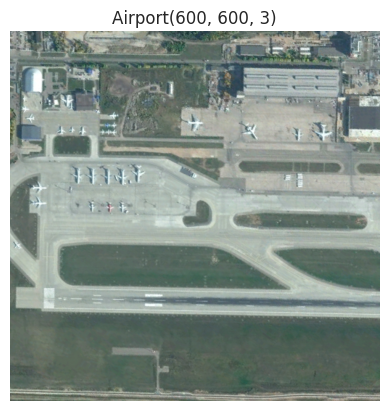

In [6]:
img = random_sample(img_class='Airport')

In [7]:
# How many images we have in each class
for c in classes:
    class_dir = os.path.join(data_dir, c)
    imgs = os.listdir(class_dir)
    print(f"There are {len(imgs)} images in '{c}' class")

There are 260 images in 'Center' class
There are 410 images in 'DenseResidential' class
There are 370 images in 'Farmland' class
There are 340 images in 'Mountain' class
There are 290 images in 'Stadium' class
There are 240 images in 'Church' class
There are 380 images in 'Port' class
There are 390 images in 'Industrial' class
There are 350 images in 'Park' class
There are 370 images in 'Playground' class
There are 310 images in 'BareLand' class
There are 360 images in 'Airport' class
There are 420 images in 'Viaduct' class
There are 410 images in 'River' class
There are 300 images in 'Desert' class
There are 250 images in 'Forest' class
There are 220 images in 'BaseballField' class
There are 390 images in 'Parking' class
There are 260 images in 'RailwayStation' class
There are 360 images in 'Bridge' class
There are 400 images in 'Beach' class
There are 300 images in 'School' class
There are 290 images in 'MediumResidential' class
There are 290 images in 'Resort' class
There are 330 im

# Dataset Split

In [10]:
!pip install split-folders
import splitfolders

  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [11]:
# Create train, test and validation sets
splitfolders.ratio(data_dir, output='output')

# Data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-06-06 14:58:13.196585: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-06 14:58:13.241711: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-06 14:58:13.242333: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 14:58:14.746021: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   shear_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen =  ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('./output/train',
                                               target_size=(600,600),
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)

val_data = val_datagen.flow_from_directory('./output/val',
                                            target_size=(600,600),
                                            batch_size=32,
                                            class_mode='categorical',
                                            seed=42)

test_data = test_datagen.flow_from_directory('./output/test',
                                             target_size=(600,600),
                                             batch_size=32,
                                             class_mode='categorical',
                                             seed=42)

Found 8000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.


# My Models - Trained from scratch

## My Model 1

In [51]:
# Load model
mymodel = tf.keras.models.load_model("./models/models/mymodel1/1")

In [12]:
mymodel.evaluate(test_data)

2023-06-04 17:14:02.057197: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138240000 exceeds 10% of free system memory.
2023-06-04 17:14:02.200346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-04 17:14:02.949839: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138240000 exceeds 10% of free system memory.
2023-06-04 17:14:03.064903: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 366186496 exceeds 10% of free system memory.
2023-06-04 17:14:03.767885: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138240000 exceeds 10% of free system memory.
2023-06-04 17:14:03.922995: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 180652032 exceeds 1

32/32 [==============================] - 35s 1s/step - loss: 1.5038 - accuracy: 0.5350


[1.5038200616836548, 0.5350000262260437]

In [68]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 598, 598, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 299, 299, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 297, 297, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 148, 148, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 32)       0

# EfficientNetB3

## EfficientNetB3 Model 1

In [12]:
EfficientNetB3_model1 = tf.keras.models.load_model("./models/models/efficientNetB3/1")

In [13]:
EfficientNetB3_model1.evaluate(test_data)

2023-06-05 23:42:31.514020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 547s 17s/step - loss: 0.5258 - accuracy: 0.8580


[0.525761604309082, 0.8579999804496765]

In [14]:
EfficientNetB3_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1536)              10783528  
                                                                 
 dense (Dense)               (None, 32)                49184     
                                                                 
 dense_1 (Dense)             (None, 30)                990       
                                                                 
Total params: 10,833,702
Trainable params: 50,174
Non-trainable params: 10,783,528
_________________________________________________________________


In [54]:
preds_probs = mymodel.predict(test_data)
len(preds_probs)

2023-06-04 17:55:01.907081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


34/34 [==============================] - 38s 1s/step


1000

## EfficientNetB3 Model 2

In [16]:
# load the model
EfficientNetB3_model2 = tf.keras.models.load_model("./models/models/EfficientNetB3/2")

In [24]:
EfficientNetB3_model2.evaluate(test_data)

2023-06-05 19:12:46.678853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 654s 20s/step - loss: 0.4420 - accuracy: 0.8810


[0.44200509786605835, 0.8809999823570251]

In [17]:
EfficientNetB3_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1536)              10783528  
                                                                 
 dense (Dense)               (None, 32)                49184     
                                                                 
 dense_1 (Dense)             (None, 30)                990       
                                                                 
Total params: 10,833,702
Trainable params: 50,174
Non-trainable params: 10,783,528
_________________________________________________________________


# MobileNetV2

## MobileNetV2 Model 1

In [18]:
MobileNetV2_model1 = tf.keras.models.load_model("./models/models/mobileNet/1")

In [5]:
#MobileNetV2_model1.evaluate(test_data)

In [20]:
MobileNetV2_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 32)                40992     
                                                                 
 dense_1 (Dense)             (None, 30)                990       
                                                                 
Total params: 2,299,966
Trainable params: 41,982
Non-trainable params: 2,257,984
_________________________________________________________________


## MobileNetV2 Model 2

In [ ]:
# load the model
MobileNetV2_model2 = tf.keras.models.load_model("./models/models/mobileNet/2")

In [ ]:
MobileNetV2_model2.evaluate(test_data)

# ResNet50V2

## ResNet50V2 Model 1

In [8]:
ResNet50V2_model1 = tf.keras.models.load_model("./models/models/ResNet50V2/1")

In [23]:
#ResNet50V2_model1.evaluate(test_data)

In [9]:
ResNet50V2_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 32)                3211296   
                                                                 
 dense_1 (Dense)             (None, 30)                990       
                                                                 
Total params: 26,777,086
Trainable params: 3,212,286
Non-trainable params: 23,564,800
_________________________________________________________________


## ResNet50V2 Model 2